<a href="https://colab.research.google.com/github/zlrs1013/IMGS210_MathForImaging/blob/main/finalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np

## Gradient Descent Visualization ##

To demonstrate why the negative gradient points to the steepest descent direction and lead to a minimum, we can visualize the gradient descent of a simple convex function $f(x) = x^2 + 2x + 1$ starting from $x=2.5$.

The red points on the graph indicate the steps taken by the
gradient descent algorithm as it minimizes the function. The
derivative of the function represents the slope at any point and the negative derivative guides us toward decreasing values of the function and eventually leads us to the minimum value at where the derivative is zero, indicating no further descent is possible.

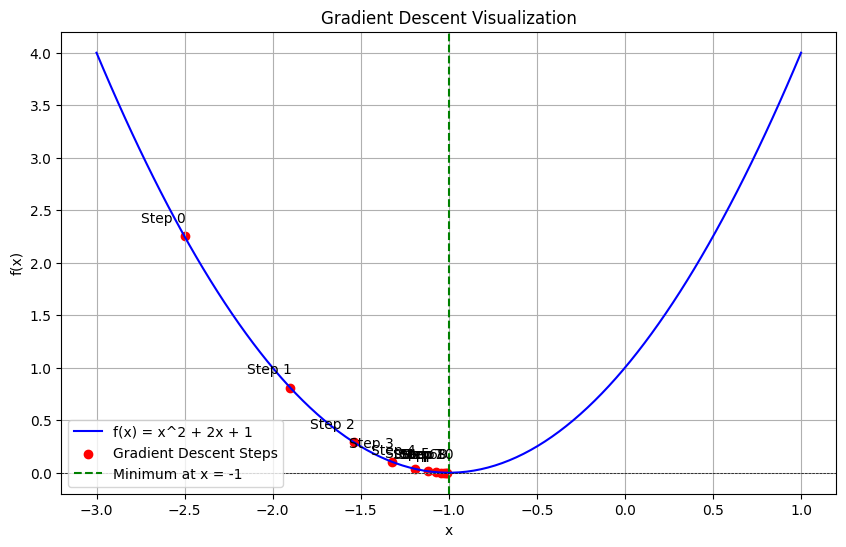

In [26]:
# Define the quadratic function and its derivative
def f(x):
    return x**2 + 2*x + 1  # A simple convex function

def df(x):
    return 2*x + 2  # Derivative of the function

# Generate x values for the plot
x = np.linspace(-3, 1, 100)
y = f(x)

def gradient_descent_demo(start_x, learning_rate, steps):
    """Visualize gradient descent on the function."""
    x_vals = [start_x]
    f_vals = [f(start_x)]

    for _ in range(steps):
        grad = df(x_vals[-1])
        new_x = x_vals[-1] - learning_rate * grad
        x_vals.append(new_x)
        f_vals.append(f(new_x))

    return x_vals, f_vals

# Initial parameters for gradient descent
start_x = -2.5
learning_rate = 0.2
steps = 10

# Perform gradient descent
x_vals, f_vals = gradient_descent_demo(start_x, learning_rate, steps)

# Plot the function and gradient descent steps
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="f(x) = x^2 + 2x + 1", color="blue")
plt.scatter(x_vals, f_vals, color="red", label="Gradient Descent Steps")

# Annotate gradient descent steps
for i, (x_val, f_val) in enumerate(zip(x_vals, f_vals)):
    plt.annotate(f"Step {i}", (x_val, f_val), textcoords="offset points", xytext=(-15, 10), ha='center')

plt.title("Gradient Descent Visualization")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(-1, color='green', linestyle='--', label="Minimum at x = -1")
plt.legend()
plt.grid()
plt.show()


## Implementation of MB-SGD for a Linear Neural Network for Regression ##

The following PyTorch code demonstrates how minibatch SGD is used to optimize a linear neural network for regression:


Epoch 10, Loss: 0.09003672450780868
Epoch 20, Loss: 0.013133192854002117
Epoch 30, Loss: 0.00803284477442503
Epoch 40, Loss: 0.007310223719105125
Epoch 50, Loss: 0.007474754983559251
Epoch 60, Loss: 0.007769153546541929
Epoch 70, Loss: 0.007365519856102764
Epoch 80, Loss: 0.00741570726968348
Epoch 90, Loss: 0.00752561604604125
Epoch 100, Loss: 0.0074191389605402945

True weights:  tensor([[ 2.],
        [-3.]])
Learned weights:  Parameter containing:
tensor([[ 2.0469, -2.9998]], requires_grad=True)

True bias:  tensor([1.])
Learned bias:  Parameter containing:
tensor([0.9663], requires_grad=True)


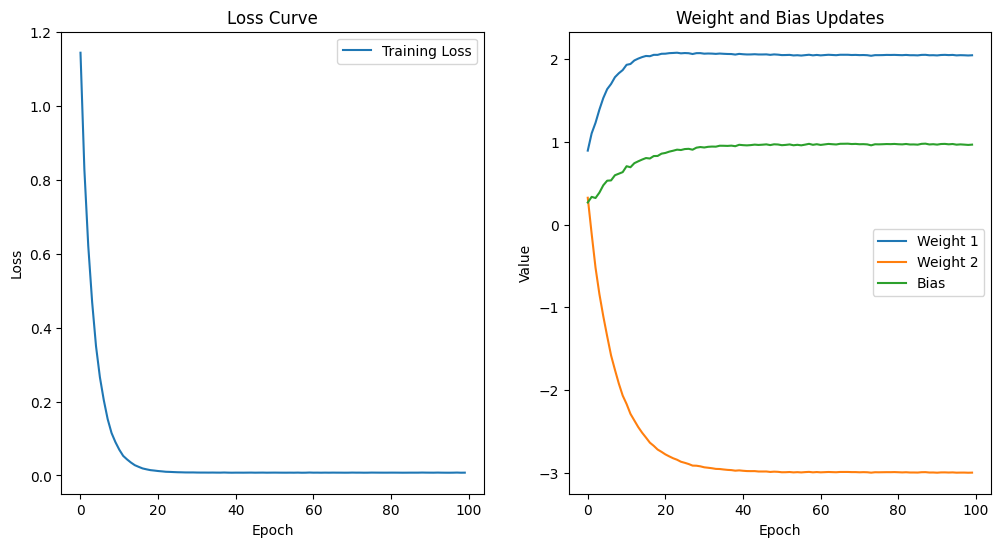

In [27]:
# Hyperparameters
batch_size = 10
learning_rate = 0.1
epochs = 100

# Generate synthetic data
torch.manual_seed(42)
X = torch.rand(100, 2)  # 100 samples, 2 features
true_W = torch.tensor([[2.0], [-3.0]])  # True weights
true_b = torch.tensor([1.0])  # True bias
y = X @ true_W + true_b + 0.1 * torch.randn(100, 1)  # Add some noise

# Define a simple linear regression model
model = nn.Linear(2, 1)  # 2 input features, 1 output

# Define the loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Create DataLoader for minibatch SGD
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training loop
loss_history = []
weights_history = []
bias_history = []

for epoch in range(epochs):
    epoch_loss = 0
    for batch_X, batch_y in dataloader:
        # Forward pass
        predictions = model(batch_X)
        loss = loss_fn(predictions, batch_y)

        # Backward pass and parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    # Store loss and parameter values for visualization
    loss_history.append(epoch_loss / len(dataloader))
    weights_history.append(model.weight.detach().clone())
    bias_history.append(model.bias.detach().clone())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}, Loss: {loss_history[-1]}")


# Display ground-truth and learned parameters
print("\nTrue weights: ", true_W)
print("Learned weights: ", model.weight)
print("\nTrue bias: ", true_b)
print("Learned bias: ", model.bias)

# Visualization 1: Loss curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss_history, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

# Visualization 2: Weight and bias updates
weights_array = torch.stack(weights_history).squeeze().numpy()
bias_array = torch.stack(bias_history).squeeze().numpy()
plt.subplot(1, 2, 2)
plt.plot(weights_array[:, 0], label="Weight 1")
plt.plot(weights_array[:, 1], label="Weight 2")
plt.plot(bias_array, label="Bias")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Weight and Bias Updates")
plt.legend()


## Backpropagation in an MLP ##

This code defines an MLP with a hidden layer, computes the loss, backpropagates the gradients, and updates the weights. The loss.backward() function automatically computes all the gradients using backpropagation based on the computational graph.

Epoch [10/100], Loss: 1.0849
Epoch [20/100], Loss: 1.0594
Epoch [30/100], Loss: 1.0442
Epoch [40/100], Loss: 1.0326
Epoch [50/100], Loss: 1.0226
Epoch [60/100], Loss: 1.0136
Epoch [70/100], Loss: 1.0054
Epoch [80/100], Loss: 0.9978
Epoch [90/100], Loss: 0.9907
Epoch [100/100], Loss: 0.9840


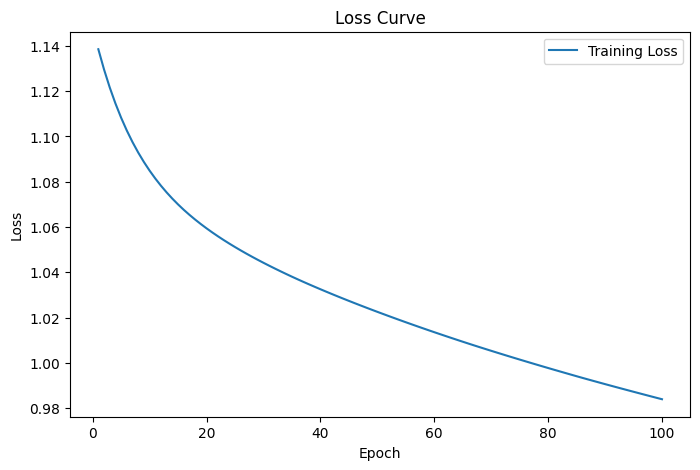

In [28]:
# Hyperparameters
input_size = 10
hidden_size = 32
output_size = 1
learning_rate = 0.01
epochs = 100

# Generate synthetic data
torch.manual_seed(42)
X = torch.randn(100, input_size)  # 100 samples, each with `input_size` features
y = torch.randn(100, output_size)  # Corresponding targets

# Define a simple MLP model
class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First fully connected layer
        self.relu = nn.ReLU()                         # Activation function
        self.fc2 = nn.Linear(hidden_size, output_size)  # Second fully connected layer/Hidden Layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
model = SimpleMLP(input_size, hidden_size, output_size)
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.SGD(model.parameters(), lr=learning_rate)  # Stochastic Gradient Descent

# For storing loss values
loss_values = []

# Training loop
for epoch in range(epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)
    loss_values.append(loss.item())  # Store loss for visualization

    # Backward pass and optimization
    optimizer.zero_grad()  # Clear gradients from the previous step
    loss.backward()        # Compute gradients
    optimizer.step()       # Update weights

    # Print loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Visualization: Loss curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), loss_values, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

## Modern Deep Learning Framework ##

PyTorch exemplifies how frameworks implement this process. When defining a model in PyTorch, tensors that require gradient computation are flagged with requires_grad=True. During the forward pass, all operations involving these tensors are recorded in a dynamic computational graph.

During the forward pass, PyTorch dynamically builds the computational graph as operations are executed. This graph is then used for gradient computation.

In [29]:
# Define inputs and parameters
x = torch.tensor([[1.0, 2.0]], requires_grad=True)  # Inputs
W = torch.tensor([[0.5, -1.0], [1.0, 0.5]], requires_grad=True)  # Weights
b = torch.tensor([0.0, 1.0], requires_grad=True)  # Bias

# Forward pass
z = x @ W + b  # Linear transformation
y = torch.tensor([[0.0, 1.0]])  # Target output
loss = ((z - y) ** 2).mean()  # Mean squared error loss

# Backward pass
loss.backward()

# Gradients are now computed and stored in the .grad attribute of each tensor
print("Gradient of W:", W.grad)
print("Gradient of b:", b.grad)


Gradient of W: tensor([[2.5000, 0.0000],
        [5.0000, 0.0000]])
Gradient of b: tensor([2.5000, 0.0000])
